In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [13]:
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=1, n_redundant=0,
    n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10
)

In [14]:
print(X[:5])
print("\n")
print(y[:5])

[[ 0.19924745 -0.11697552]
 [-0.24882029 -0.73115232]
 [-0.3544904  -0.7081059 ]
 [-1.59086506 -2.01199214]
 [-0.20083951  1.63493163]]


[1 1 1 0 1]


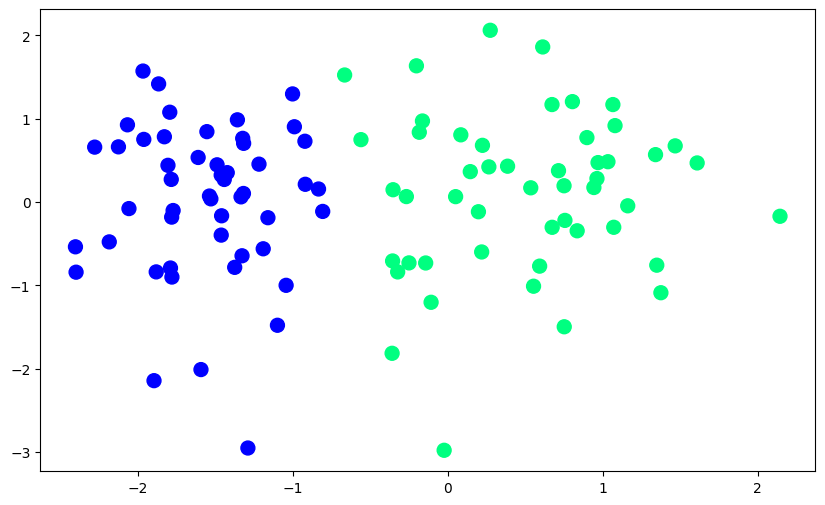

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.show()

In [16]:
def Perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]

    return weights[0], weights[1:]

def step(z):
    return 1 if z>=0 else 0

In [17]:
intercept_, coef_ = Perceptron(X, y)
print("Weights:", coef_)
print("Intercept:", intercept_)

Weights: [1.39222043 0.05031124]
Intercept: 1.0


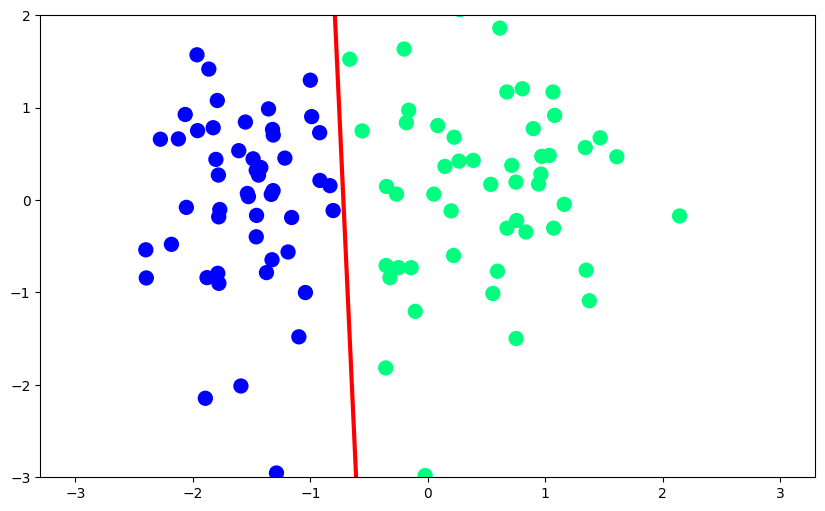

In [18]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.show()

In [25]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [ ]:
# Loss Function 
def perceptron(X,y):
    
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
    
        for i in range(X.shape[0]):

            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            
    return w1,w2,b

In [ ]:
# 1️⃣ Generalize for n features
def perceptron(X, y, lr=0.1, epochs=1000):
    w = np.ones(X.shape[1])
    b = 1

    for _ in range(epochs):
        for i in range(X.shape[0]):
            z = np.dot(w, X[i]) + b
            if y[i] * z < 0:
                w = w + lr * y[i] * X[i]
                b = b + lr * y[i]
    return w, b


In [27]:
w1,w2,b = perceptron(X,y)

In [28]:
print(w1,w2,b)

1.006638570722407 0.22215119727529098 1.3000000000000003


In [29]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

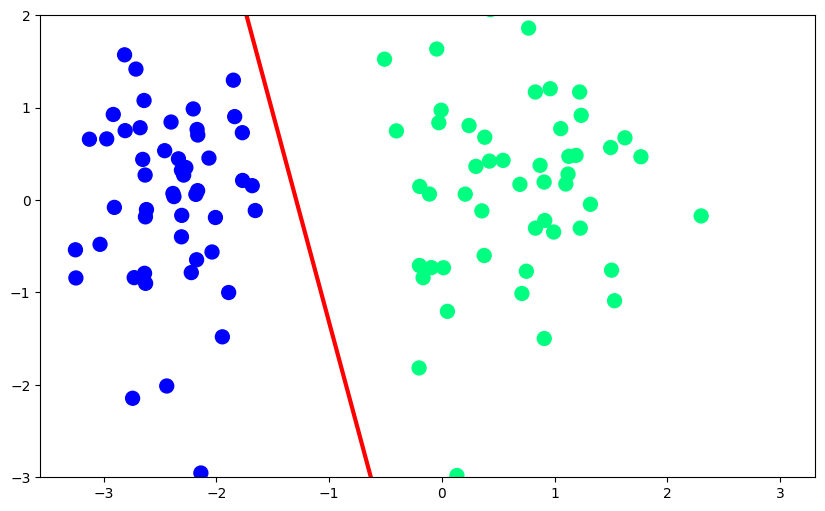

In [30]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)